<a href="https://colab.research.google.com/github/SatyaSampreeth/python_applications/blob/main/pypro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sketchify


In [ ]:
#pip install opencv-python
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('img.jpg',0)

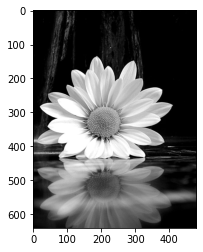

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
inv=  255-img

Inverting

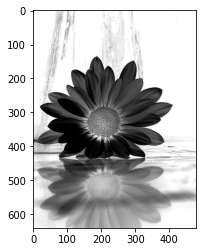

In [ ]:
plt.imshow(inv,cmap='gray')

Smoothing the image

In [ ]:
blur = cv2.GaussianBlur(inv, ksize=(21,21), sigmaX=0,sigmaY=0)

Deleting details

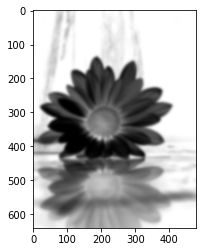

In [ ]:
plt.imshow(blur,cmap='gray')

In [ ]:
dodge = lambda image, mask: cv2.divide(image, 255-mask, scale=256)

In [ ]:
blended = dodge(img, blur)

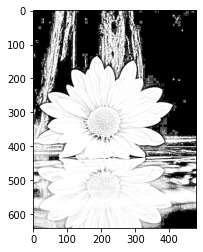

In [ ]:
plt.imshow(blended, cmap='gray')

In [ ]:
cv2.imwrite('imgsketch.jpg', blended)

True

# Pdf2excel


In [ ]:
!pip install pdfplumber

In [8]:
import re
import parse
import pdfplumber
import pandas as pd
from collections import namedtuple

In [9]:
Line = namedtuple('Line', 'company_id company_name doctype reference currency voucher inv_date due_date open_amt_tc open_amt_bc current months1 months2 months3')

In [59]:
company_re = re.compile(r'(V\d+) (.*) Phone:')
line_re = re.compile(r'\d{2}/\d{2}/\d{4} \d{2}/\d{2}/\d{4}')

In [60]:
file = 'Sample Report Pythonic.pdf'

In [77]:
lines = []
total_check = 0

with pdfplumber.open(file) as pdf:
    pages = pdf.pages
    for page in pdf.pages:
        text = page.extract_text()
        for line in text.split('\n'):
            # print(line)
            comp = company_re.search(line)
            if comp:
                vend_no, vend_name = comp.group(1), comp.group(2)

            elif line.startswith('INVOICES'):
                doctype = 'INVOICE'

            elif line.startswith('CREDITNOTES'):
                doctype = 'CREDITNOTE'

            elif line_re.search(line):
                items = line.split()
                lines.append(Line(vend_no, vend_name, doctype, *items))
                
            elif line.startswith('Supplier total'):
                tot = float(line.split()[2].replace(',', ''))
                total_check += tot

In [78]:
df = pd.DataFrame(lines)
df.head()

,company_id,company_name,doctype,reference,currency,voucher,inv_date,due_date,open_amt_tc,open_amt_bc,current,months1,months2,months3
0,V50012,Company A LTD,CREDITNOTE,478,USD,BFS030OB/000000057,11/03/2014,12/30/2014,263.52,263.52,0.00,0.00,0.00,263.52
1,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062628/1,USD,BFS026/000001137,03/30/2019,03/30/2019,-102.00,-102.00,0.00,-102.00,0.00,0.00
2,V50012,CARGO SAFETRAVEL LTD,INVOICE,J1062638/1,USD,BFS026/000001136,02/28/2019,03/15/2019,-204.00,-204.00,0.00,-204.00,0.00,0.00
3,V50014,ChaseB REGISTER USDA,INVOICE,110-135633,USD,BFS026/000001064,02/05/2019,04/29/2019,"-4,665.00","-4,665.00","-4,665.00",0.00,0.00,0.00
4,V50015,METALS CHEMICALS GROUP LIMITED,INVOICE,SI191433,USD,BFS026/000000908,02/12/2019,03/30/2019,-198.00,-198.00,0.00,-198.00,0.00,0.00


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    131 non-null    object
 1   company_name  131 non-null    object
 2   doctype       131 non-null    object
 3   reference     131 non-null    object
 4   currency      131 non-null    object
 5   voucher       131 non-null    object
 6   inv_date      131 non-null    object
 7   due_date      131 non-null    object
 8   open_amt_tc   131 non-null    object
 9   open_amt_bc   131 non-null    object
 10  current       131 non-null    object
 11  months1       131 non-null    object
 12  months2       131 non-null    object
 13  months3       131 non-null    object
dtypes: object(14)
memory usage: 14.5+ KB


In [80]:
df['inv_date'] = pd.to_datetime(df['inv_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [81]:
for col in df.columns[-6:]:
  df[col] = df[col].map(lambda x: float(str(x).replace(',','')))

In [82]:
df['open_amt_bc'].sum()

-129580.73999999999

In [83]:
total_check

-129580.73999999999